In [1]:
##cd safepy-master/
##source activate safepy_env_
##jupyter-notebook 
import sys
from os.path import expanduser

In [2]:
# Add path to folder containing safepy
sys.path.append('/Users/ssetia/Downloads/safepy-master/')

In [3]:
import safe
%matplotlib inline
import numpy as np

# Annotating your own network with Gene Ontology

In [4]:
sf = safe.SAFE()

### Load and display the network

In [ ]:
# Option 1: Tab-delimited 3-column format (node1 label - node2 label - edge weight). 
# The node labels will be used as keys to map nodes to attributes and therefore have to match the node identifiers in the attribute file.
%time
sf.load_network(network_file='/Users/ssetia/Desktop/LD_epistasis/all_ohta_models.closestgene.wgo.allpairwise.aggregated.gene1nteqgene2.txt')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 15.7 µs
Loading network from /Users/ssetia/Desktop/LD_epistasis/all_ohta_models.closestgene.wgo.allpairwise.aggregated.gene1nteqgene2.txt


/Users/ssetia/Downloads/safepy-master/safe_io.py:26: FutureWarning: read_table is deprecated, use read_csv instead.
  data = pd.read_table(filename, sep='\t', header=None)
//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Applying the spring-embedded network layout... (may take several minutes)


In [15]:
#! head -n 500 /Users/ssetia/Desktop/LD_epistasis/all_ohta_models_closestgene.weights_wGO.aggregated2.txt > testing.txt
!wc -l testing.txt

     500 testing.txt


In [5]:
## Use models with aggregated weights and node attribute file from above in cytoscape
## Option 3: Cytoscape session file (CYS)
#sf.load_network(network_file='/Users/ssetia/Downloads/safe-data-master/networks/Costanzo_Science_2016.cys',
                #node_key_attribute='ORF')
%time
sf.load_network(network_file='/Users/ssetia/Desktop/LD_epistasis/all_ohta_models_closestgene.weights_wGO.aggregated2_weightgt0.005_gene1nteggene2.cys',
                node_key_attribute='ORF')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs
Loading network from /Users/ssetia/Desktop/LD_epistasis/all_ohta_models_closestgene.weights_wGO.aggregated2_weightgt0.005_gene1nteggene2.cys
Loading the cys file /Users/ssetia/Desktop/LD_epistasis/all_ohta_models_closestgene.weights_wGO.aggregated2_weightgt0.005_gene1nteggene2.cys...
Loading the first view: CytoscapeSession-2019_04_26-16_38/views/52-15535-Created+from+DataFrame.xgmml
Loading the first network: CytoscapeSession-2019_04_26-16_38/networks/36-From+cyREST.xgmml
Calculating edge lengths...


//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


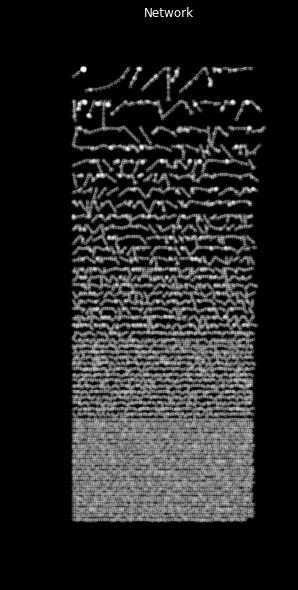

In [6]:
sf.plot_network()

### Load the attributes

The row labels in the attribute file should be matching the node keys in the network.

In [7]:
sf.load_attributes(attribute_file='/Users/ssetia/Desktop/LD_epistasis/all_ohta_models.closest.genes.GOterms_matrix.txt')

Loading attributes from /Users/ssetia/Desktop/LD_epistasis/all_ohta_models.closest.genes.GOterms_matrix.txt


/Users/ssetia/Downloads/safepy-master/safe_io.py:278: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  node2attribute = pd.read_table(file_name)



Attribute data provided: 12771 labels x 10878 attributes
A1CF, A2ML1, A4GALT and 4890 other labels in the attribute file were not found in the network.

Attribute data mapped onto the network: 7878 labels x 10878 attributes
Values: 3937836 NaNs
Values: 85627407 zeros
Values: 69477 positives
Values: 0 negatives


In [5]:
print(np.__version__)

1.14.1


### Define the local neighborhoods and compute their enrichment for each attribute

In [11]:
# Explicitly define the node_distance metric and the neighborhood radius
sf.define_neighborhoods(node_distance_metric='shortpath_weighted_layout', neighborhood_radius=0.25)

Node distance metric: shortpath_weighted_layout
Neighborhood definition: 0.25 x diameter
Number of nodes per neighborhood (mean +/- std): 3.74 +/- 2.71


In [12]:
sf.compute_pvalues(multiple_testing=True)

Overwriting global settings:
	multiple_testing=True
Using the hypergeometric test to calculate enrichment...
Running FDR-adjustment of p-values...


### Plot the enrichment landscapes of a sample of attributes

//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


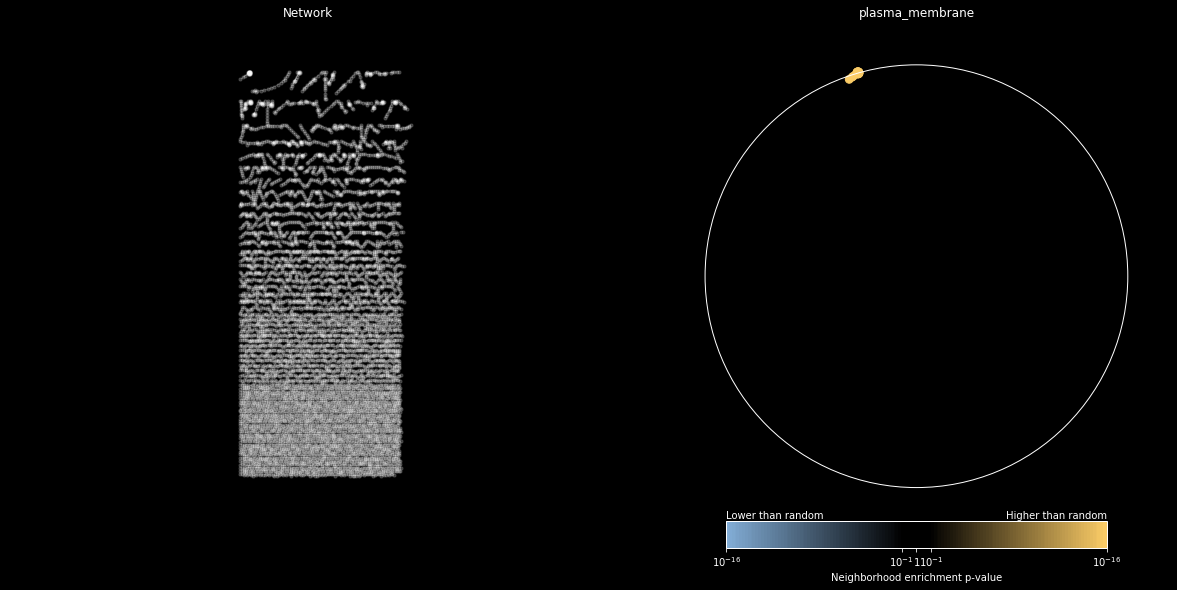

In [13]:
# Just the enrichment itself with min and max boundaries on the colormap
sf.plot_sample_attributes(attributes=['plasma_membrane'])

//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


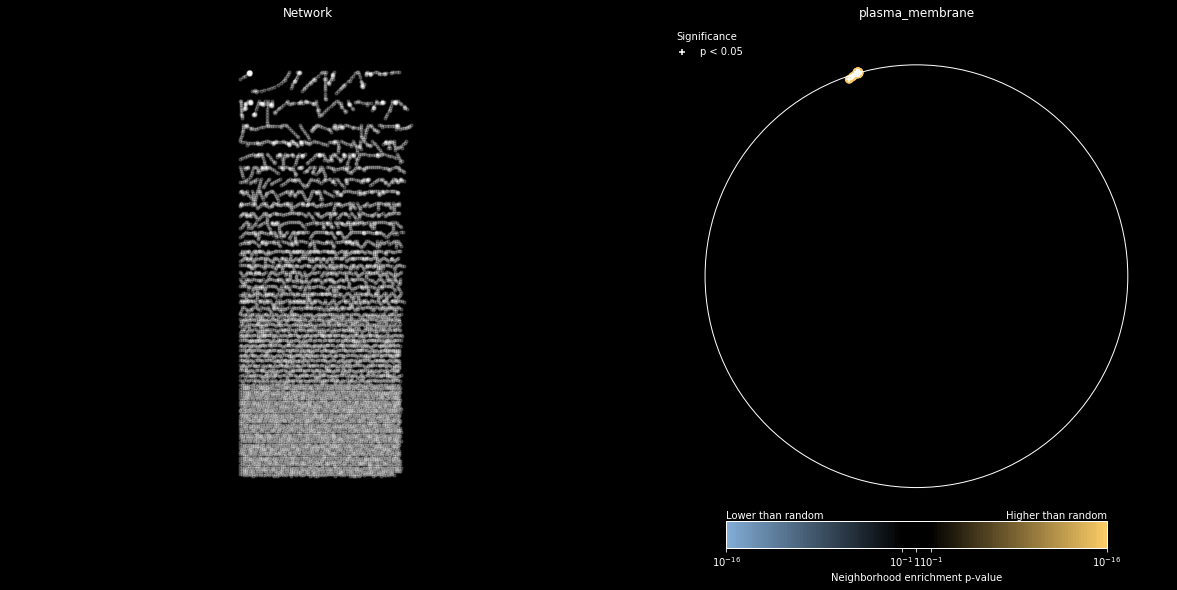

In [14]:
# Show the neighborhoods that are significant (p < 0.05)
sf.plot_sample_attributes(attributes=['plasma_membrane'], show_significant_nodes=True)

//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


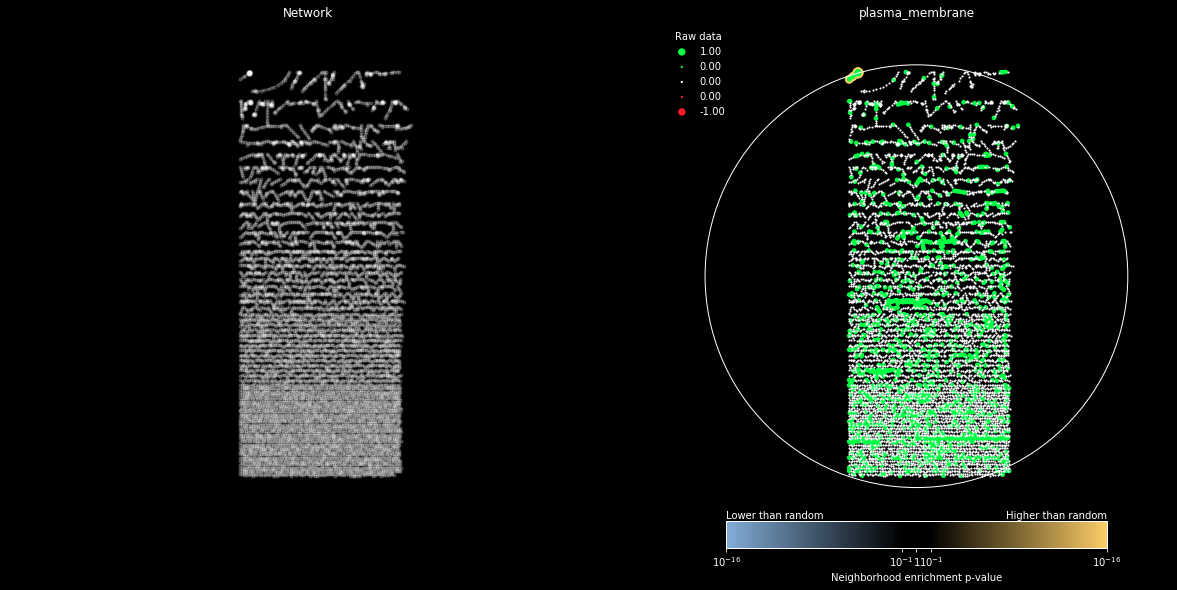

In [15]:
# Show the raw data (nodes annotated to this attribute)
sf.plot_sample_attributes(attributes=['plasma_membrane'], show_raw_data=True)

### Combine the enrichment landscapes into a single composite map

In [16]:
sf.define_top_attributes()

Criteria for top attributes:
- minimum number of enriched neighborhoods: 10
- region-specific distribution of enriched neighborhoods as defined by: connectivity
Number of top attributes: 11


In [31]:
#sf.compute_pvalues(num_permutations=1000)

//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


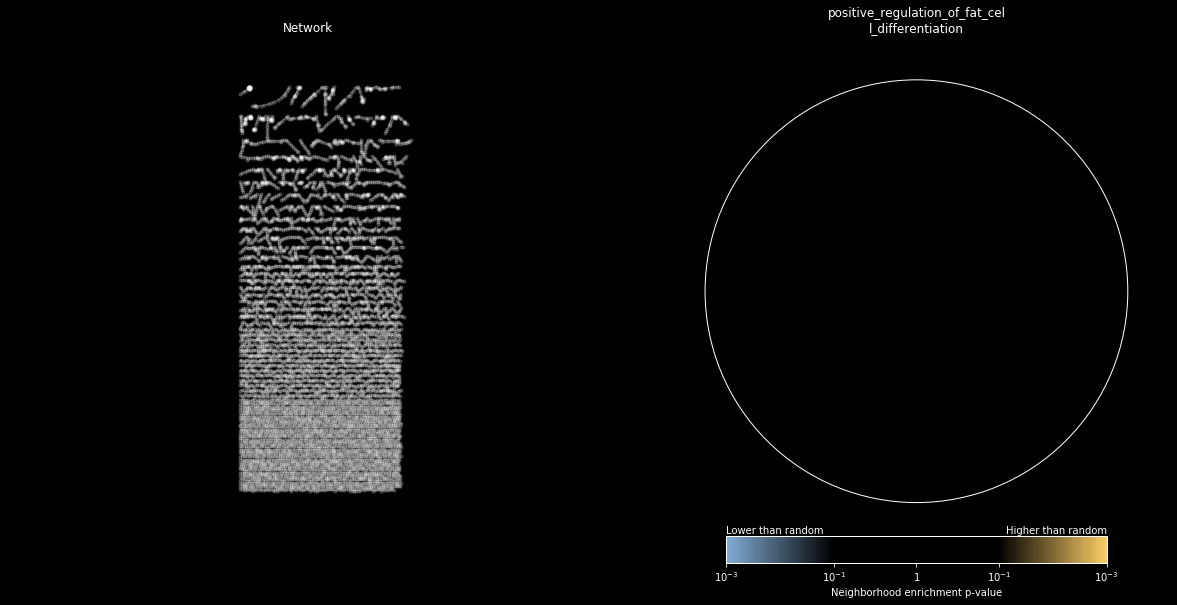

In [17]:
sf.plot_sample_attributes()

In [18]:
sf.define_domains(attribute_distance_threshold = 0.65)

Number of domains: 4 (containing 1-6 attributes)


In [19]:
sf.trim_domains()

Removed 0 domains because they were the top choice for less than 10 neighborhoods.


//anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


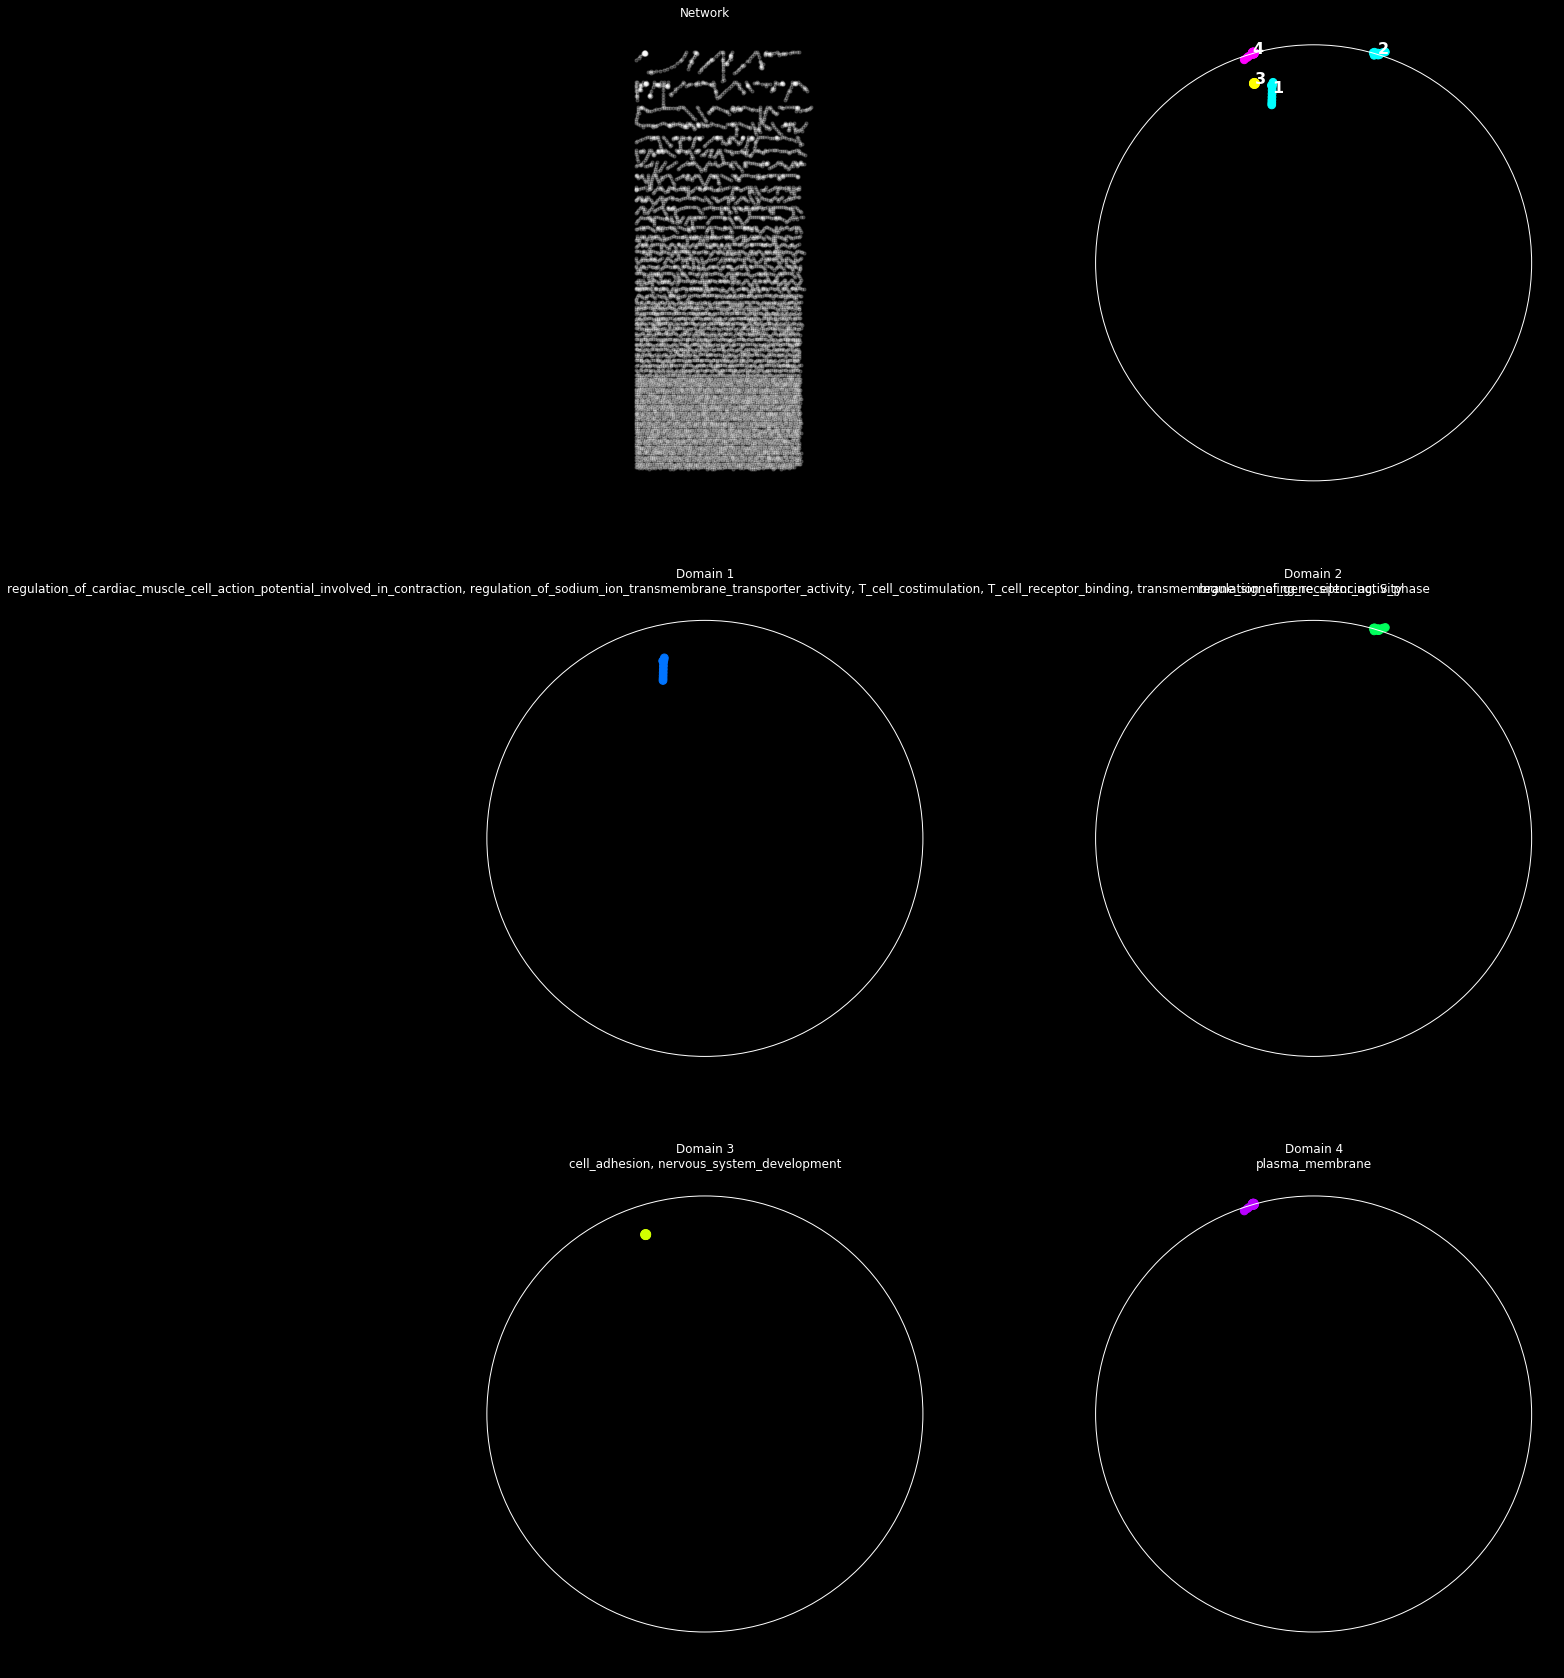

In [20]:
sf.plot_composite_network(show_each_domain=True)

In [19]:
sf.print_output_files()

/Users/ssetia/Downloads/safepy-master/domain_properties_annotation.txt
/Users/ssetia/Downloads/safepy-master/attribute_properties_annotation.txt
/Users/ssetia/Downloads/safepy-master/node_properties_annotation.txt


In [58]:
sf.save()